# Carbon-di-Oxide, Temperature & Energy Plot

### Library Imports
- **pandas (pd):** For loading and manipulating datasets.  
- **matplotlib.pyplot (plt):** For creating plots and visualizations.  
- **seaborn (sns):** For advanced and more aesthetic statistical plots.  
- **numpy (np):** For numerical computations and array handling.  
- **pathlib.Path:** For handling file paths in a clean, cross-platform way.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

### Load and Prepare Global Dataset
- **Set file path**: Defines the location of the merged dataset (`whole_data_merged.csv`).  
- **Load dataset**: Reads the CSV file into a DataFrame.  
- **Filter WORLD data**: Keeps only rows where `country` is "WORLD".  
- **Drop missing values**: Ensures only complete records with CO₂, temperature, and energy consumption are kept for analysis.  

In [3]:
# File Path
BASE_DIR = Path().resolve().parents[1]
file_PATH = BASE_DIR / "data" / "final" / "whole_data_merged.csv"

# Load the merged dataset
df = pd.read_csv(file_PATH)

# Filter for World data only
world_df = df[df["country"].str.upper() == "WORLD"]

# Drop rows with missing values in co2 or temperature or 
world_df = world_df.dropna(subset=["co2", "global_temp_c", "primary_energy_consumption_twh"])

### CO₂ vs Global Temperature with Uncertainty
- **Flexible column detection** - Automatically selects the correct columns for year, CO₂, and temperature (with uncertainty).  
- **Data cleaning** - Converts numeric values, removes missing rows, and sorts by year for "WORLD" data.  
- **Dual-axis plot** -  
  - Left axis: CO₂ emissions trend (blue).  
  - Right axis: Global temperature trend (red) with shaded band for uncertainty.  
- **Purpose** - Visualizes the relationship between rising CO₂ emissions and global temperatures over time.  


In [4]:
# Flexible column picks
year_col = "year" if "year" in df.columns else "Year"
temp_candidates = ["global_temp_c", "temperature_c", "temp_c", "global_temperature_c"]
temp_col = next((c for c in temp_candidates if c in df.columns), None)
unc_col = "uncertainty_c"
co2_candidates = ["co2", "total_co2", "co2_emissions_mt"]
co2_col = next((c for c in co2_candidates if c in df.columns), None)

# Guard: proceed only if columns exist
assert temp_col is not None, f"Temperature column not found. Tried: {temp_candidates}"
assert unc_col in df.columns, "Column 'uncertainty_c' not found."
assert co2_col is not None, f"CO₂ column not found. Tried: {co2_candidates}"
assert "country" in df.columns, "Column 'country' not found."

world = df[df["country"].str.upper() == "WORLD"].copy()
world[year_col] = pd.to_numeric(world[year_col], errors="coerce")
world[temp_col] = pd.to_numeric(world[temp_col], errors="coerce")
world[unc_col] = pd.to_numeric(world[unc_col], errors="coerce")
world[co2_col] = pd.to_numeric(world[co2_col], errors="coerce")
world = world.dropna(subset=[year_col, temp_col, unc_col, co2_col]).sort_values(year_col)

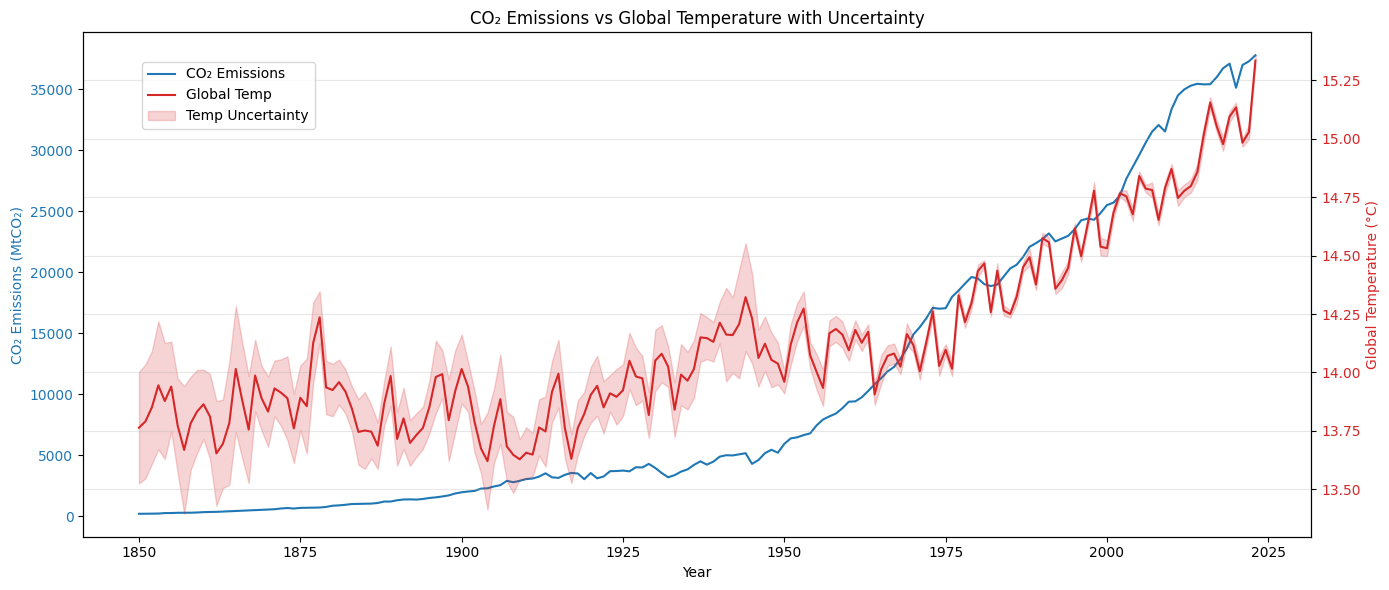

In [5]:
# Create plot 
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left y-axis: CO₂ emissions
color_co2 = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("CO₂ Emissions (MtCO₂)", color=color_co2)
ax1.plot(world[year_col], world[co2_col], color=color_co2, label="CO₂ Emissions")
ax1.tick_params(axis='y', labelcolor=color_co2)

# Right y-axis: Global temperature with uncertainty
ax2 = ax1.twinx()
color_temp = 'tab:red'
ax2.set_ylabel("Global Temperature (°C)", color=color_temp)
ax2.plot(world[year_col], world[temp_col], color=color_temp, label="Global Temp")
ax2.fill_between(
    world[year_col],
    world[temp_col] - world[unc_col],
    world[temp_col] + world[unc_col],
    color=color_temp,
    alpha=0.2,
    label="Temp Uncertainty"
)
ax2.tick_params(axis='y', labelcolor=color_temp)

# Formatting
plt.title("CO₂ Emissions vs Global Temperature with Uncertainty")
fig.tight_layout()
plt.grid(True, alpha=0.3)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

- **Long-term rise** - Both CO₂ emissions and global average temperature have increased strongly since the mid-20th century.  
- **Uncertainty band** - Earlier temperature records (1850–1950) show higher uncertainty, but the warming trend becomes clearer after 1950.  
- **Acceleration** - CO₂ emissions surge sharply post-1950, with temperatures showing a parallel climb.  
- **Insight** - The close co-movement highlights the strong correlation between anthropogenic CO₂ emissions and global warming.  


### CO₂ Emissions vs Energy Consumption (World)

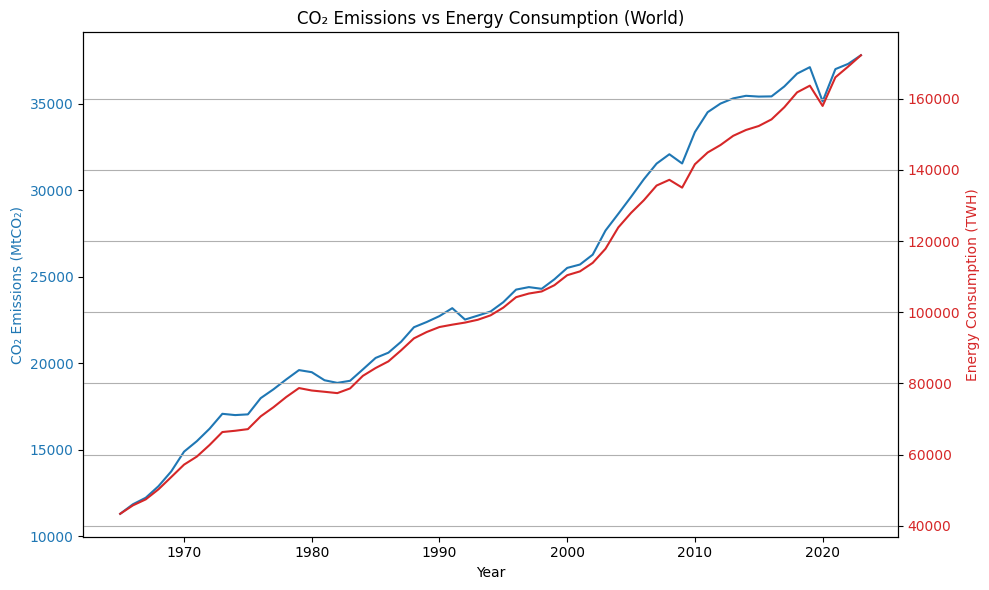

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot CO2 on the left y-axis
color = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("CO₂ Emissions (MtCO₂)", color=color)
ax1.plot(world_df["year"], world_df["co2"], color=color, label="CO₂ Emissions")
ax1.tick_params(axis='y', labelcolor=color)

# Plot temperature on the right y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Energy Consumption (TWH)", color=color)
ax2.plot(world_df["year"], world_df["primary_energy_consumption_twh"], color=color, label="Global Temp")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("CO₂ Emissions vs Energy Consumption (World)")
fig.tight_layout()
plt.grid(True)
plt.show()

- **Tight coupling** - CO₂ emissions and global energy consumption rise almost in lockstep since 1965.  
- **Energy demand as main driver** - Suggests fossil fuels dominate the energy mix, directly linking demand growth to higher emissions.  
- **Post-2000 surge** - Both metrics accelerate sharply, reflecting rapid industrialization and globalization.  
- **Minor divergences** - Small gaps appear during shocks (e.g., 2008 financial crisis, COVID-19), but the long-term trajectory remains aligned.  
- **Insight** - Decarbonizing energy supply is critical—without major shifts to renewables, energy demand growth will continue pushing emissions upward.  
